#### Created By: 
Iman sharifi --- 98210184

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _plot(img, title='image', figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(img), plt.title(title, fontsize=18)
    plt.xticks([]), plt.yticks([])
    plt.show()

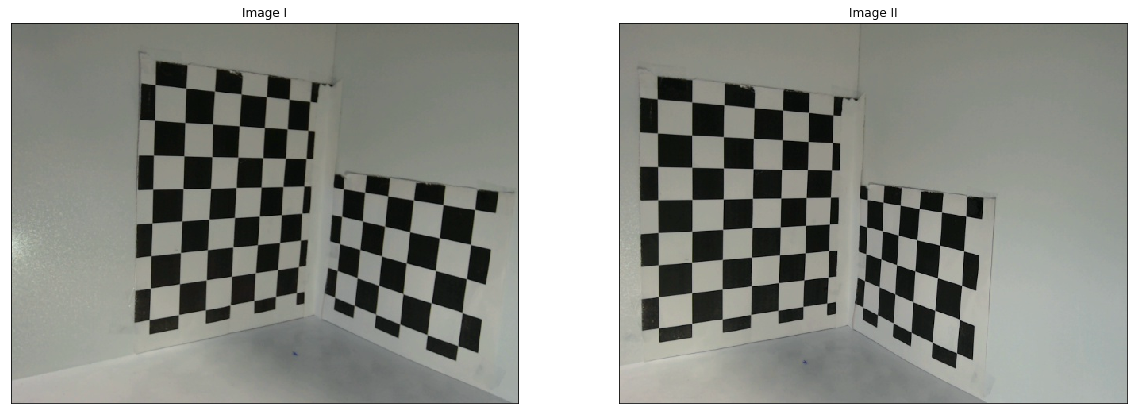

In [3]:
img1_ = cv2.imread('HW4\\4-1.jpg')
img2_ = cv2.imread('HW4\\4-2.jpg')
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img1_),plt.title('Image I')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2_),plt.title('Image II')
plt.xticks([]), plt.yticks([])
plt.show()

# 3D Reconstruction

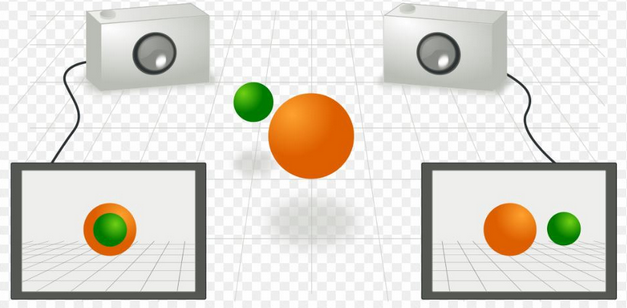

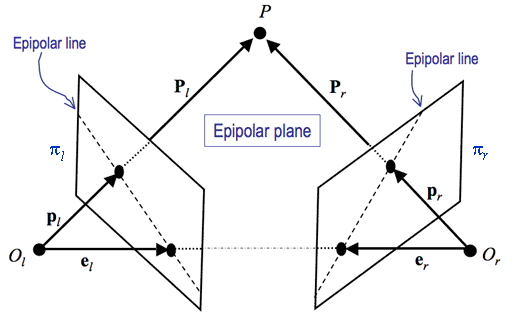

# Find Corners

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# prepare object points
nx = 8 #number of inside corners in x
ny = 6 #number of inside corners in y

nx = np.int32(nx)
ny = np.int32(ny)

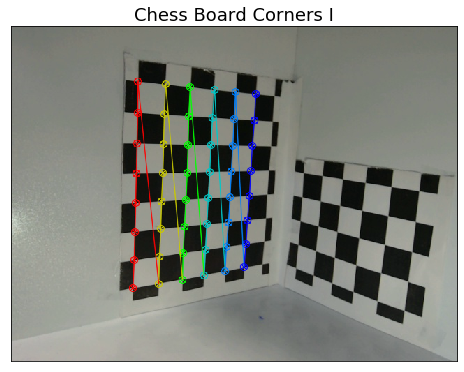

In [5]:
fname = 'HW4\\4-1.jpg'
img = cv2.imread(fname)
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the chessboard corners(find pattern in chess board)
ret, corners1 = cv2.findChessboardCorners(gray, (nx, ny), None)
# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners1, ret)
    _plot(img, 'Chess Board Corners I', (8,8))

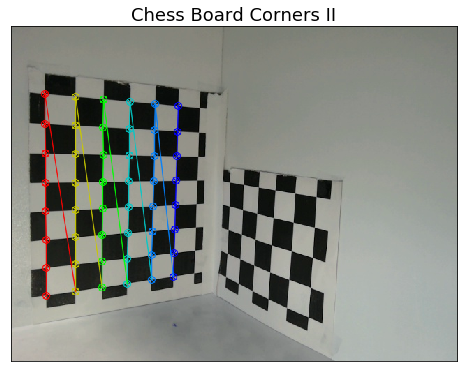

In [6]:
fname = 'HW4\\4-2.jpg'
img = cv2.imread(fname)
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the chessboard corners(find pattern in chess board)
ret, corners2 = cv2.findChessboardCorners(gray, (nx, ny), None)
# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners2, ret)
    
_plot(img, 'Chess Board Corners II', (8,8))

# Fundamental Matrix Using Chess Board Corners

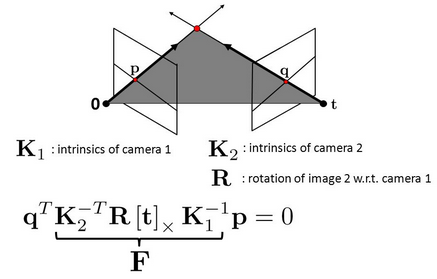

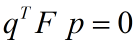

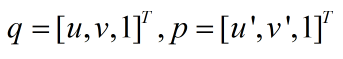

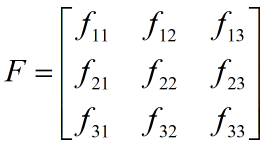

In [7]:
F1, mask1 = cv2.findFundamentalMat(corners1,corners2,cv2.FM_LMEDS)
# Fundamental Matrix
print(F1)

[[-2.11705221e-07 -2.91832839e-05  5.47896672e-03]
 [ 3.39411048e-05  1.04109371e-06 -7.06690644e-03]
 [-6.76606067e-03  1.98689780e-03  1.00000000e+00]]


In [8]:
F2, mask2 = cv2.findFundamentalMat(corners2,corners1,cv2.FM_LMEDS)
# Fundamental Matrix
print(F2)

[[-2.11705206e-07  3.39411027e-05 -6.76606059e-03]
 [-2.91832821e-05  1.04109370e-06  1.98689818e-03]
 [ 5.47896668e-03 -7.06690655e-03  1.00000000e+00]]


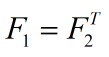

# Find Fundamental Matrix Using SIFT Matching

In [9]:
img1 = cv2.imread('HW4\\4-1.jpg',0)  #queryimage # left image
img2 = cv2.imread('HW4\\4-2.jpg',0)  #trainimage # right image
# sift
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        
# Cast type to int32
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F_sift, mask_sift = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
# pts1 = pts1[mask.ravel()==1]
# pts2 = pts2[mask.ravel()==1]

In [10]:
# Fundamental Matrix
print(F_sift)

[[-2.40275224e-07 -9.05564206e-06  4.63038922e-03]
 [ 1.08948339e-05  1.24317303e-06 -1.31836799e-02]
 [-5.36800536e-03  1.08208827e-02  1.00000000e+00]]


### Corresponding Line with predefined point

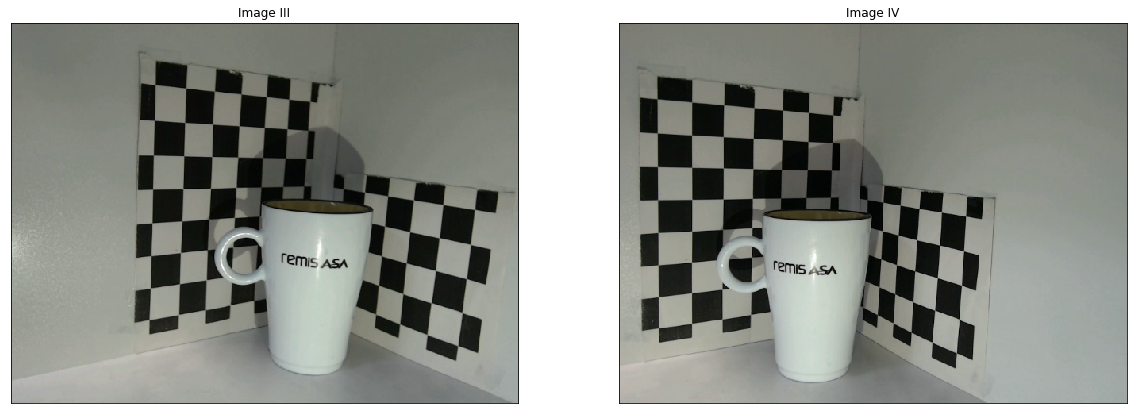

In [11]:
# Reading Images
img3_ = cv2.imread('HW4\\4-3.jpg')
img4_ = cv2.imread('HW4\\4-4.jpg')
# Show Images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img3_),plt.title('Image III')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img4_),plt.title('Image IV')
plt.xticks([]), plt.yticks([])
plt.show()

#### Desired Point (265,305)

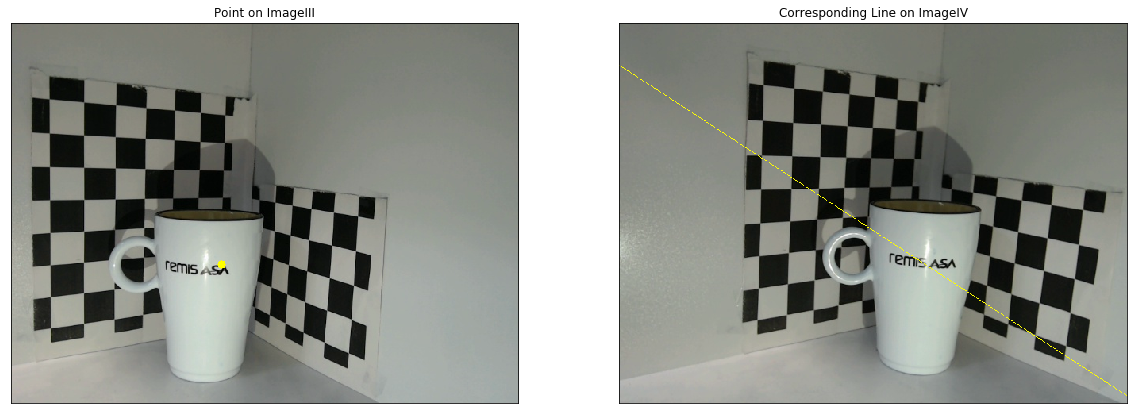

In [12]:
pts1_ = np.array([265,305])
pts2_ = []
r,c,_ = img3_.shape
lines = cv2.computeCorrespondEpilines(pts1_.reshape(-1,1,2), 1,np.transpose(F1))
lines = lines.reshape(-1,3)

color = (255,255,0)#tuple(np.random.randint(0,255,3).tolist())
img7 = cv2.circle(img4_,tuple(pts1_),5,color,-1)
for r in lines:
    x0,y0 = map(int, [0, -r[2]/r[1] ])
    x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
    img8 = cv2.line(img3_, (x0,y0), (x1,y1), color,1)   

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img7),plt.title('Point on ImageIII')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img8),plt.title('Corresponding Line on ImageIV')
plt.xticks([]), plt.yticks([])
plt.show()

## Find Corresponding Lines with Chess Board Corners

In [14]:
def drawlines(img1,img2,lines,pts1):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    nx, ny = 8, 6
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1 in zip(lines,pts1):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
    ret, corners = cv2.findChessboardCorners(img2, (nx, ny), None)
    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img2, (nx, ny), corners, ret)   
#         img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
#         img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

# 2D Line  in homogenous system

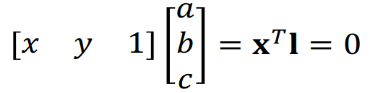

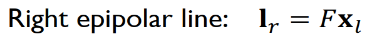

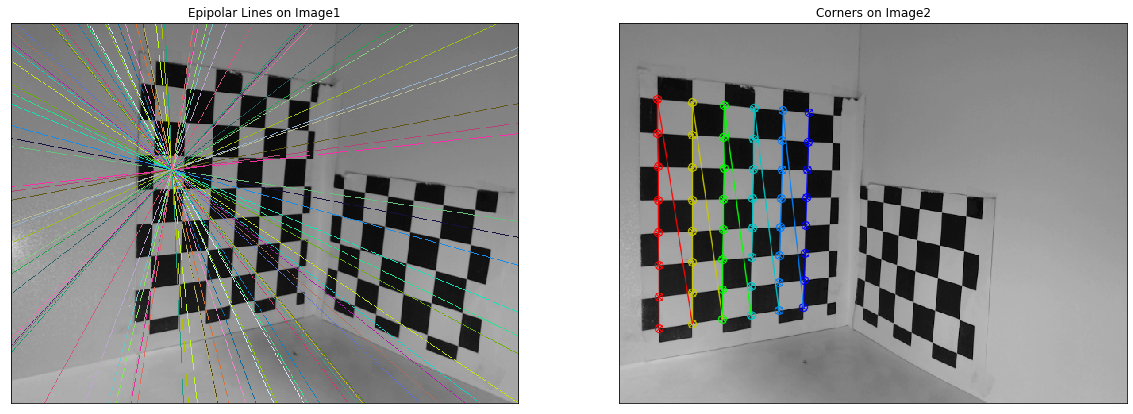

In [18]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(corners2.reshape(-1,1,2), 2,F1)
lines1 = lines1.reshape(-1,3)
img3,img4 = drawlines(img1,img2,lines1,corners2)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img3),plt.title('Epipolar Lines on Image1')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img4),plt.title('Corners on Image2')
plt.xticks([]), plt.yticks([])
plt.show()

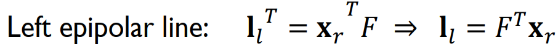

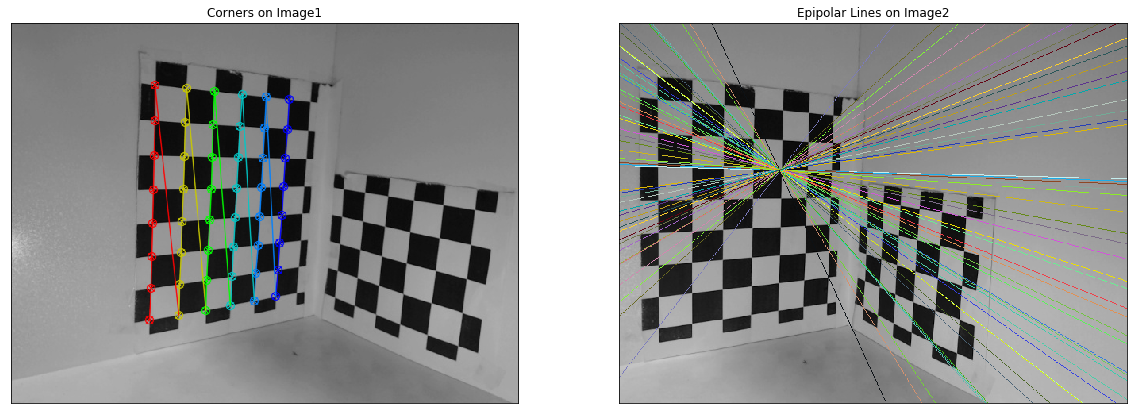

In [19]:
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(corners1.reshape(-1,1,2), 1,F2)
lines2 = lines2.reshape(-1,3)
img5,img6 = drawlines(img2,img1,lines2,corners1)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img6),plt.title('Corners on Image1')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img5),plt.title('Epipolar Lines on Image2')
plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
cv2.imwrite('epipolar3.jpg', img3)
cv2.imwrite('epipolar5.jpg', img5)

True

طول و عرض هر مربع موجود در شطرنج تقریبا برابر 50 پیکسل است . و محل تقاطع خطوط تقریبا به اندازه سه و نیم برابر عرض یک مربع جابجا شده است. یعنی با فرض عدم چرخش، دوربین به اندازه 3.5*50 یعنی 175 پیکسل (تقریبا 7 سانتی متر) جابجا شده است.ه